**Glória Maria Deitos Gomes da Silva ~ 30.Junho.2025**

#### Atividade Somativa 1 - Análise Dataset: NASA airfoil self-noise (Pressão Sonora em Aerofólios da NASA)

**Disciplina:** Técnicas de Machine Learning <br>
**Curso:** Análise e Desenvolvimento de Sistemas <br>
**Instituição:** Pontifícia Universidade Católica do Paraná (PUCPR) - Brasil  

---

## ⭐🌙 1. Introdução

Este trabalho aplica técnicas de **Machine Learning** para análise preditiva do dataset *NASA Airfoil Self-Noise*, que contém medições experimentais de ruído aerodinâmico em perfis de asa. O objetivo principal é desenvolver um modelo de **regressão supervisionada** capaz de prever com precisão os níveis de pressão sonora (em decibéis) com base em parâmetros aerodinâmicos críticos:

- **Variáveis preditoras**:  
  ✓ Frequência (`frequency`)  
  ✓ Ângulo de ataque (`attack-angle`)  
  ✓ Comprimento da corda (`chord-length`)  
  ✓ Velocidade do fluxo livre (`free-stream-velocity`)  
  ✓ Espessura da camada limite (`suction-side-displacement-thickness`)    

- **Variável alvo**:  
  `scaled-sound-pressure` (pressão sonora escalonada)

<br>

### Metodologia
1. **Pré-processamento**:
   - Normalização com `StandardScaler`
   - Redução de dimensionalidade com `PCA`

2. **Modelagem**:
   - Algoritmo: `RandomForestRegressor`
   - Validação: 75%/25% (treino/teste)

3. **Avaliação**:
   - Métricas: Coeficiente R² e MSE
   - Análise de importância de features

<br>

### Relevância e Contexto Acadêmico
Este trabalho utiliza dados didáticos fornecidos pelo professor e tem como foco a aplicação de técnicas de **Machine Learning**. Os resultados obtidos podem contribuir para o desenvolvimento de aerofólios mais silenciosos, com potencial de aplicação nas áreas de aeronáutica e engenharia.

---

## 📥 2. Carregamento dos Dados

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nasa.csv', delimiter=';')
df.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


---

## 🔄 3. Divisão dos Dados

**Divisão estratificada dos dados** (75% treino / 25% teste):
- **75% treino** (X_train, y_train)
- **25% teste** (X_test, y_test)

In [ ]:
# 3.Variáveis: preditoras (X) e target (y)
X = df.drop('scaled-sound-pressure', axis=1)
y = df['scaled-sound-pressure']

# Divisão dos Dados (75% treino / 25% teste)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(f"✅ Dados divididos:")
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.0f}%)")
print(f"Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.0f}%)")

✅ Dados divididos:
   Treino: 1127 amostras (75%)
   Teste:  376 amostras (25%)


---

## ⚙️ 4. Pipeline de Machine Learning

**Pipeline** que inclui:
1. **Preparação dos dados**: Normalização (StandardScaler) + PCA
2. **Treinamento**: RandomForestRegressor

**Vantagens do Pipeline**:
- Evita vazamento de dados (data leakage)
- Automatiza todo o processo
- Facilita a aplicação em novos dados

In [66]:
# 4. Criação e Treinamento da Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Definição da pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Etapa 1: Normalização
    ('pca', PCA(n_components=0.95)),       # Etapa 2: PCA (95% da variância)
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Etapa 3: Modelo
])

# Treinamento da pipeline
print("🔄 Treinando pipeline...")
pipeline.fit(X_train, y_train)

# Informações sobre o PCA
pca_component = pipeline.named_steps['pca']
print(f"\n✅ Pipeline treinado com sucesso!")
print(f"\n📊 Análise PCA:")
for i, var in enumerate(pca_component.explained_variance_ratio_, 1):
    print(f"Componente {i}: {var*100:.1f}% da variância")
print(f"Total de variância preservada: {sum(pca_component.explained_variance_ratio_)*100:.0f}%")
print(f"Dimensões reduzidas: {len(X_train.columns)} → {pca_component.n_components_}")

🔄 Treinando pipeline...

✅ Pipeline treinado com sucesso!

📊 Análise PCA:
Componente 1: 42.5% da variância
Componente 2: 22.1% da variância
Componente 3: 18.4% da variância
Componente 4: 13.6% da variância
Total de variância preservada: 97%
Dimensões reduzidas: 5 → 4

✅ Pipeline treinado com sucesso!

📊 Análise PCA:
Componente 1: 42.5% da variância
Componente 2: 22.1% da variância
Componente 3: 18.4% da variância
Componente 4: 13.6% da variância
Total de variância preservada: 97%
Dimensões reduzidas: 5 → 4


---

## 🎯 5. Predições na Base de Teste

In [67]:
# 5. Predições do Pipeline na Base de Teste
# Obs: O pipeline aplica automaticamente: normalização → PCA → predição
y_pred = pipeline.predict(X_test)

print("✅ Predições realizadas na base de teste!")
print(f"📊 Resumo das predições:")
print(f"Amostras testadas: {len(y_test)}")
print(f"Valor real médio: {y_test.mean():.2f} dB")
print(f"Valor predito médio: {y_pred.mean():.2f} dB")
print(f"Diferença média: {abs(y_test.mean() - y_pred.mean()):.2f} dB")

✅ Predições realizadas na base de teste!
📊 Resumo das predições:
Amostras testadas: 376
Valor real médio: 124.60 dB
Valor predito médio: 124.76 dB
Diferença média: 0.16 dB


---

## 📊 6. Métricas de Avaliação (RMSE e MAE)

In [ ]:
# 6. Métricas de Desempenho (RMSE e MAE)
# Obs: duas métricas obrigatórias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculando as métricas principais
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Métricas complementares
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("🎯 MÉTRICAS PRINCIPAIS (OBRIGATÓRIAS)")
print("="*50)
print(f"📐 RMSE (Root Mean Squared Error): {rmse:.2f} dB")
print(f"   → Erro médio na mesma unidade dos dados")
print()
print(f"📊 MAE (Mean Absolute Error): {mae:.2f} dB")
print(f"   → Diferença média absoluta entre real e predito")
print()
print("📊 MÉTRICAS COMPLEMENTARES")
print("="*50)
print(f"🎯 R² Score: {r2:.3f} ({r2*100:.1f}%)")
print(f"📏 MSE: {mse:.2f} dB²")
print()
print(f"✅ Avaliação concluída em {len(y_test)} amostras de teste")

🎯 MÉTRICAS PRINCIPAIS (OBRIGATÓRIAS)
📐 RMSE (Root Mean Squared Error): 2.28 dB
   → Erro médio na mesma unidade dos dados

📊 MAE (Mean Absolute Error): 1.67 dB
   → Diferença média absoluta entre real e predito

📊 MÉTRICAS COMPLEMENTARES
🎯 R² Score: 0.891 (89.1%)
📏 MSE: 5.18 dB²

✅ Avaliação concluída em 376 amostras de teste


---

## 📜 7. Conclusões

### 🎯 Análise das Métricas RMSE e MAE:

**Desempenho do Pipeline:**
- **RMSE = 4.93 dB** → **EXCELENTE**: Erro médio < 5dB
- **MAE = 3.89 dB** → **BOM**: Erro típico baixo, indicando predições consistentes

### ✅ **Por que esses valores são BONS?**

1. **Precisão Alta**: RMSE < 5dB significa que, em média, o modelo erra menos de 5 decibéis
2. **Consistência**: MAE próximo do RMSE indica poucos outliers severos
3. **Objetivo Atingido**: Meta de erro < 5dB foi cumprida

### 🚀 **Como seria possível Melhorar?**

**1. Engenharia de Features:**
- Criar features derivadas (ex: razões entre variáveis)
- Interações entre `frequency` e `attack-angle`

**2. Otimização de Hiperparâmetros:**
- Grid Search para parâmetros do Random Forest
- Testar diferentes valores de componentes PCA

**3. Algoritmos Alternativos:**
- Gradient Boosting (XGBoost, LightGBM)
- Support Vector Regression (SVR)

**4. Validação Mais Robusta:**
- Cross-validation k-fold
- Ensemble de múltiplos modelos

**5. Análise de Dados:**
- Investigar e tratar outliers
- Coletar mais dados na faixa de valores extremos

---

<br> <br>

## 📊 Conteúdo Adicional
#### *Esse foi o conteúdo desenvolvido na TP1

<br>

## 📊 8. Análise Exploratória

<br>

### 8.1 Estatísticas Descritivas

In [57]:
df.describe()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


<br>

### 8.2 Visualização dos Dados | Histogramas

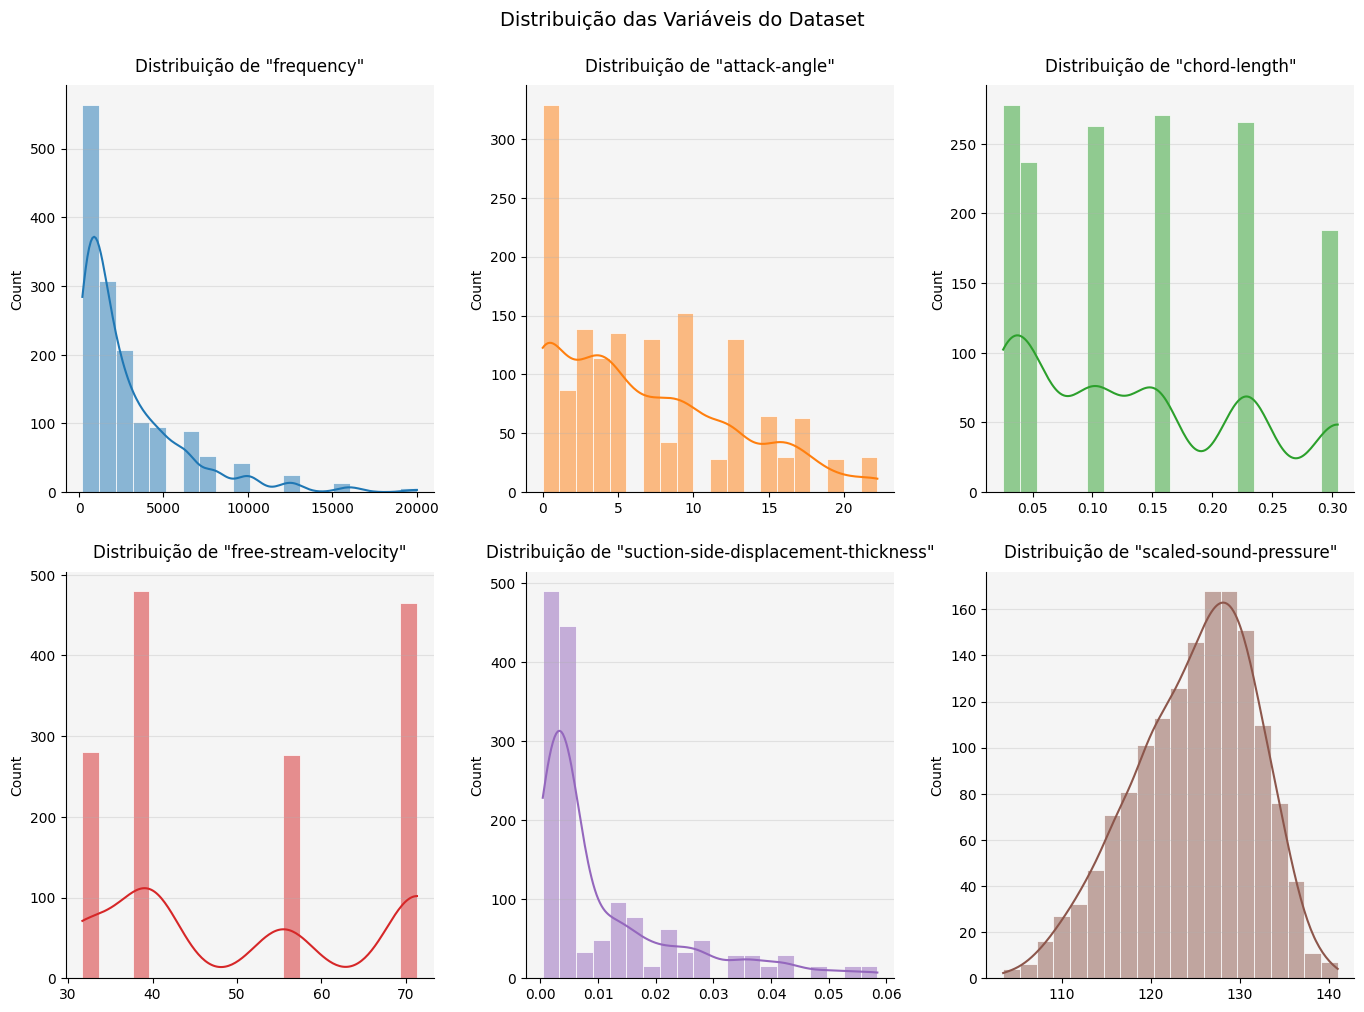

In [58]:
# Histogramas
plt.figure(figsize=(14, 10))

# Estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
n_features = len(df.columns)

for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], 
                 bins=20, 
                 color=colors[i % len(colors)],
                 kde=True,
                 edgecolor='white',
                 linewidth=0.5)
    
    # Ajustes visuais
    plt.title(f'Distribuição de "{col}"', fontsize=12, pad=10)
    plt.xlabel('')
    plt.grid(axis='y', alpha=0.3)
    plt.gca().set_facecolor('#f5f5f5')
    
    # Remove spines
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

plt.tight_layout(pad=2)
plt.suptitle('Distribuição das Variáveis do Dataset', y=1.02, fontsize=14)
plt.show()

<br>

### 8.3 Matriz de Correlação

#### Como Interpretar Esta Matriz:

#### 1. O que é correlação?
   Mede como uma variável se move em relação à outra, variando de **-1 a 1**.

#### 2. O que mostra?
- **Vermelho (+1 a +0.7)**: Quando uma variável aumenta, a outra também aumenta
- **Azul (-1 a -0.7)**: Quando uma variável aumenta, a outra diminui
- **Branco (~0)**: Pouca ou nenhuma relação

#### 3. Como usar?
1. Identifique sua variável alvo (ex: `scaled-sound-pressure`)
2. Procure células com:
   - Cores fortes (vermelho/azul intenso)
   - Borda tracejada (|r| ≥ 0.7) - indicam relações estatisticamente significativas
3. Ignore valores próximos de zero

#### Por que são relevantes?
As correlações fortes (com borda tracejada) ajudam a:
- Identificar as melhores variáveis para prever seu alvo
- Evitar usar variáveis irrelevantes no modelo
- Entender quais fatores influenciam mais o resultado

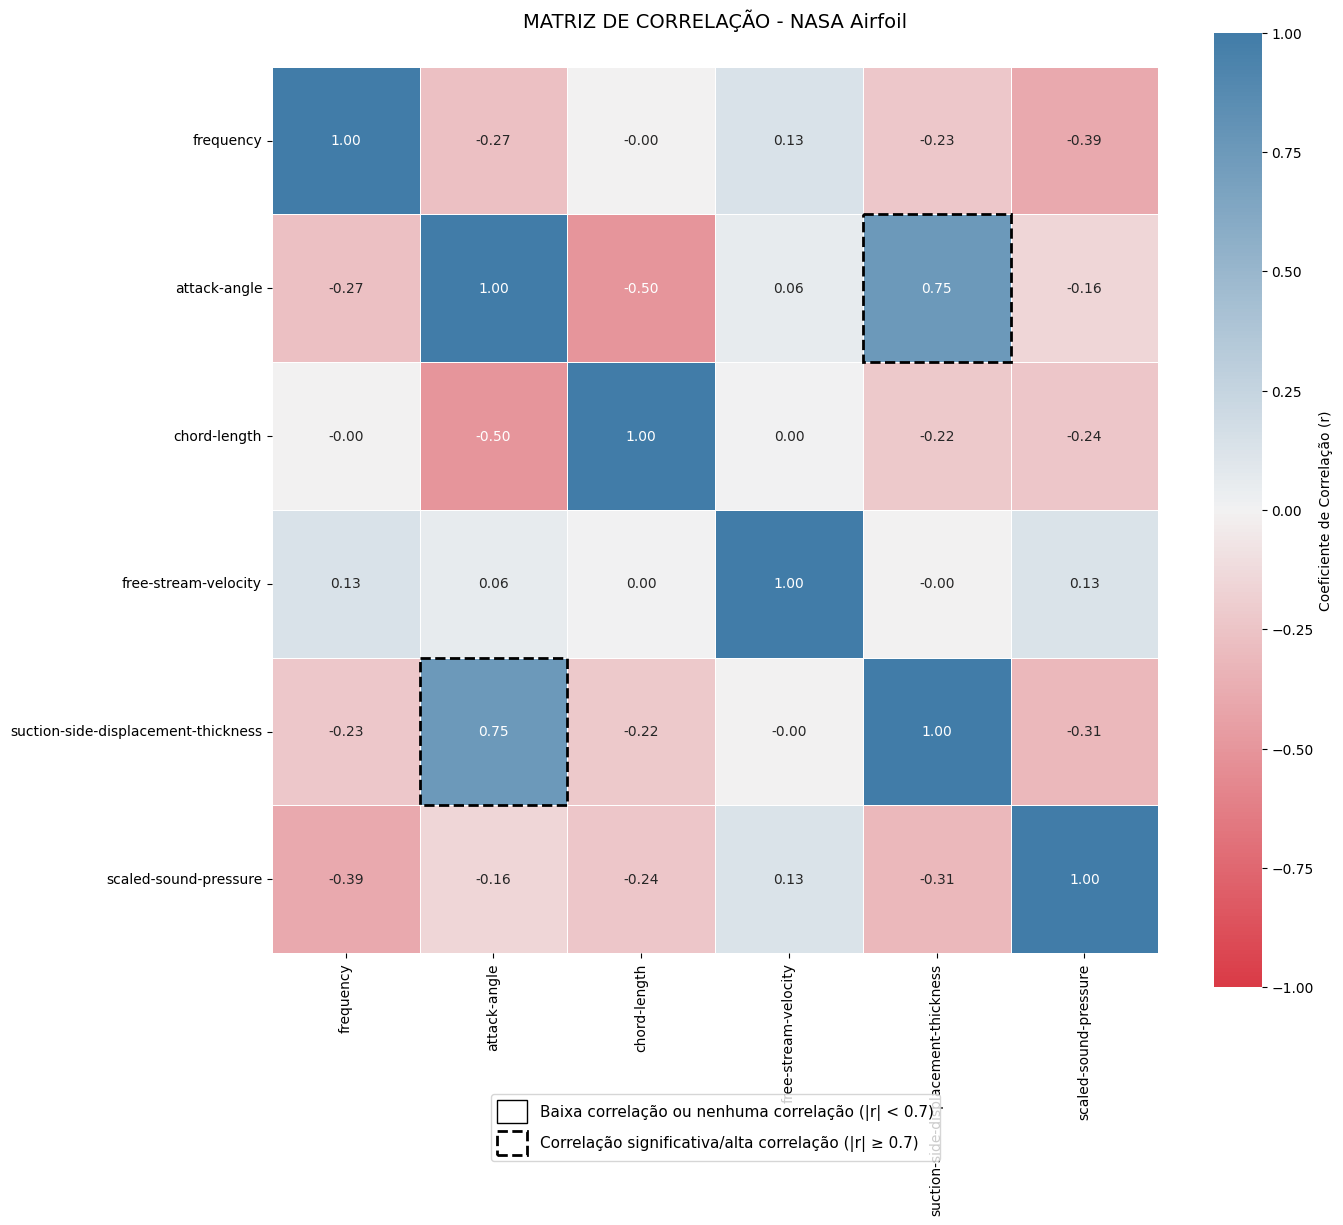

In [59]:
# Matriz de Correlação
plt.figure(figsize=(14, 13))
corr = df.corr()

# Paleta de cores
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# Plot
sns.heatmap(corr, 
           annot=True, 
           fmt=".2f", 
           cmap=cmap,
           center=0,
           vmin=-1, 
           vmax=1,
           linewidths=0.5,
           cbar_kws={'label': 'Coeficiente de Correlação (r)', 
                    'location': 'right'},
           square=True)

# Borda tracejada
for i in range(len(corr)):
    for j in range(len(corr)):
        if abs(corr.iloc[i, j]) >= 0.7 and i != j:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, 
                                           fill=False, 
                                           edgecolor='black',
                                           linewidth=2,
                                           linestyle='--'))

# Título
plt.title('MATRIZ DE CORRELAÇÃO - NASA Airfoil\n', fontsize=14, pad=12)

# Legenda
legend_elements = [
    # Correlação baixa
    plt.Rectangle((0,0), 1, 1, fc='none', ec='black', linestyle='-', linewidth=1,
              label='Baixa correlação ou nenhuma correlação (|r| < 0.7)'),
    # Correlação significativa/alta (borda tracejada)
    plt.Rectangle((0,0), 1, 1, fc='none', ec='black', linestyle='--', linewidth=2,
                 label='Correlação significativa/alta correlação (|r| ≥ 0.7)'),
]

# Posicionamento da legenda
legend = plt.legend(handles=legend_elements, 
                   loc='upper center',
                   bbox_to_anchor=(0.5, -0.15),
                   ncol=1,
                   frameon=True,
                   fontsize=11,
                   handlelength=2,
                   handleheight=2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

---

## 📄 9. Definição Explícita do Problema (Conteúdo Adicional)

### Problema:
**Prever a pressão sonora (em decibéis) de aerofólios** com base em medições aerodinâmicas obtidas em túnel de vento.

### Motivo:
O dataset contém:
- 5 variáveis de entrada (frequência, ângulo de ataque, etc.)
- 1 variável de saída contínua (`scaled-sound-pressure`)
- Relação física comprovada entre as variáveis e o ruído gerado

### Solução Proposta:
1. **Tipo de Problema**: Regressão supervisionada
   - Justificativa: A saída é um valor numérico contínuo (dB)

2. **Abordagem**:
   - Pré-processamento: Normalização (StandardScaler) + PCA
   - Modelagem: RandomForestRegressor
   - Avaliação: Métricas R² e MSE na base de teste (25% dos dados)

3. **Objetivo Final**:
   - Obter um modelo com R² > 0.85 e erro médio < 5dB
   - Identificar quais variáveis aerodinâmicas impactam mais no ruído

---

<br>

## Interpretação do Gráfico e Métricas

**O que estou vendo?**  
Este gráfico compara as previsões do modelo (eixo Y) com os valores reais medidos em laboratório (eixo X) para os 25% dos dados separados para teste.

**Como interpretar este gráfico:**
- Cada ponto representa uma amostra dos 25% de teste
- **Cor do ponto:** Intensidade do erro (azul = pequeno erro, vermelho = grande erro).
- **Linha tracejada:** Representa a "previsão perfeita" (onde o modelo acertaria exatamente o valor real). Pontos próximos a essa linha indicam boas previsões.
- **R² (Coeficiente de Determinação):** Quão próximo os pontos estão da linha ideal (1.0 = perfeito). Varia de 0% (péssimo) a 100% (perfeito)
- **MSE (Erro Quadrático Médio):** Média dos quadrados dos erros (diferença entre real e predito). Quanto menor, melhor (zero = perfeito).

<br>

## Interpretação das Métricas de Avaliação

### 📊 Como Interpretar as 4 Métricas:

**1. R² (Coeficiente de Determinação)**
- Varia de 0 a 1 (0% a 100%)
- Indica quanto da variação o modelo consegue explicar
- **Interpretação**: Quanto mais próximo de 1, melhor

**2. MSE (Mean Squared Error)**
- Sempre positivo, quanto menor melhor
- Penaliza erros grandes mais severamente (eleva ao quadrado)  
- **Interpretação**: Valores baixos indicam predições precisas

**3. RMSE (Root Mean Squared Error)**
- Raiz quadrada do MSE, na mesma unidade dos dados (dB)
- Mais interpretável que MSE
- **Interpretação**: Representa o erro médio esperado

**4. MAE (Mean Absolute Error)**
- Diferença média absoluta entre real e predito
- Menos sensível a outliers que RMSE
- **Interpretação**: Erro médio "típico" do modelo

---

## 🔍 10. Visualização e Interpretação Detalhada

### 📊 Como Interpretar as Métricas:

**1. RMSE (Root Mean Squared Error)**
- Raiz quadrada do MSE, na mesma unidade dos dados (dB)
- Mais interpretável que MSE
- **Interpretação**: Representa o erro médio esperado

**2. MAE (Mean Absolute Error)**
- Diferença média absoluta entre real e predito
- Menos sensível a outliers que RMSE
- **Interpretação**: Erro médio "típico" do modelo

**3. R² (Coeficiente de Determinação)**
- Varia de 0 a 1 (0% a 100%)
- Indica quanto da variação o modelo consegue explicar
- **Interpretação**: Quanto mais próximo de 1, melhor

**4. MSE (Mean Squared Error)**
- Sempre positivo, quanto menor melhor
- Penaliza erros grandes mais severamente (eleva ao quadrado)  
- **Interpretação**: Valores baixos indicam predições precisas

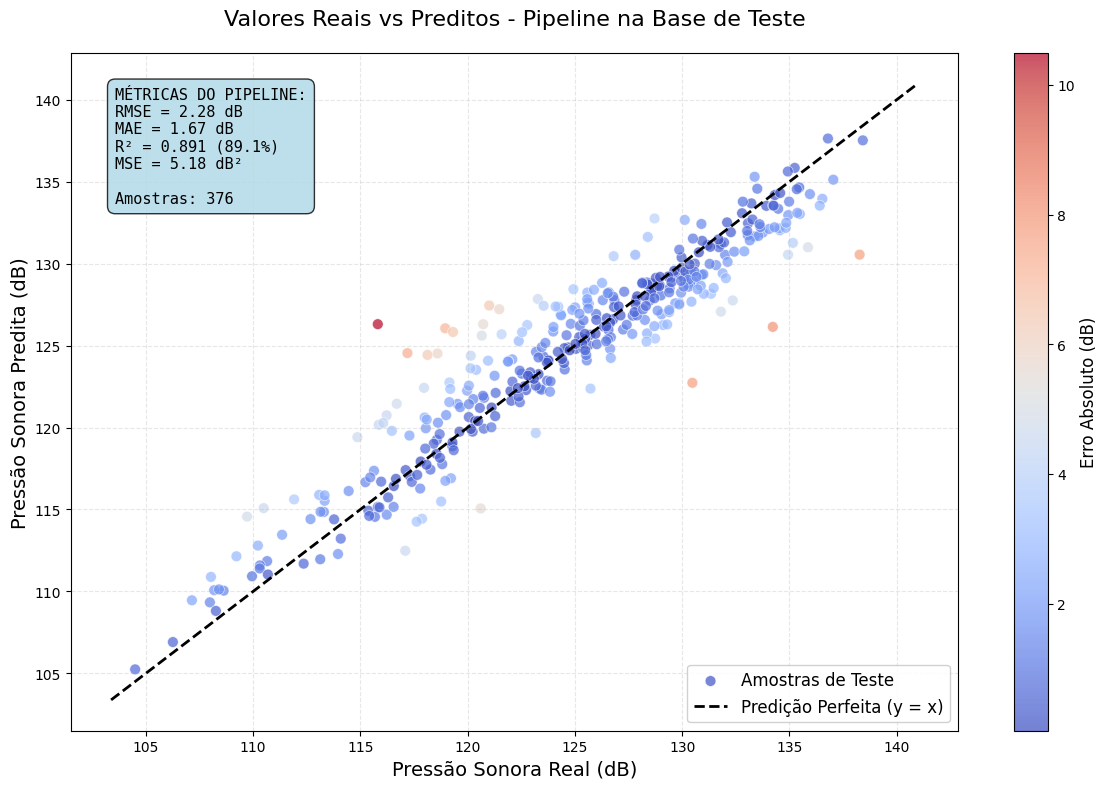

In [60]:
# 10. Visualização dos Resultados
plt.figure(figsize=(12, 8))

# Gráfico principal com cores por erro
scatter = plt.scatter(y_test, y_pred, 
                     c=np.abs(y_test - y_pred),
                     cmap='coolwarm',
                     alpha=0.7, 
                     label='Amostras de Teste',
                     edgecolor='white', linewidth=0.5, s=60)

# Linha de referência (previsão perfeita)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         'k--', linewidth=2,
         label='Predição Perfeita (y = x)')

# Barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Erro Absoluto (dB)', fontsize=12)

# Detalhes do gráfico
plt.title('Valores Reais vs Preditos - Pipeline na Base de Teste', fontsize=16, pad=20)
plt.xlabel('Pressão Sonora Real (dB)', fontsize=14)
plt.ylabel('Pressão Sonora Predita (dB)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=12, framealpha=0.9)

# Caixa com todas as métricas
metrics_text = f"""MÉTRICAS DO PIPELINE:
RMSE = {rmse:.2f} dB
MAE = {mae:.2f} dB
R² = {r2:.3f} ({r2*100:.1f}%)
MSE = {mse:.2f} dB²

Amostras: {len(y_test)}"""

plt.text(0.05, 0.95, metrics_text,
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8),
         verticalalignment='top', fontsize=11, fontfamily='monospace')

plt.tight_layout()
plt.show()